# **Modelling and Evaluation - Brain Tumor Detection**

## Objectives

* Answer business requirement 2: 
    * The client is interested in having a reliable and functional ML model to predict if an MRI scan of a brain has the absence or presence of a brain tumor. 

## Inputs



## Outputs




## Comments/Conclusions

---

## Import Packages

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

---

## Change Working Directory

In [2]:
cwd= os.getcwd()

In [3]:
os.chdir('/workspace/brain-tumor-detection')
print("You set a new current directory")

You set a new current directory


In [4]:
work_dir = os.getcwd()
work_dir

'/workspace/brain-tumor-detection'

---

## Set Input Directories

Set train, validation and test paths

In [5]:
my_data_dir = 'inputs/mriscans_dataset/mri-scans'
train_path = my_data_dir + '/train'
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'

## Set Output Directory

In [6]:
version = 'v2'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(work_dir) and version in os.listdir(work_dir + '/outputs'):
    print('Old version is already available create a new version.')
    pass
else:
    os.makedirs(name=file_path)

Old version is already available create a new version.


## Set Label Names

In [7]:
labels = os.listdir(train_path)

print(f"Project Labels: {labels}")

Project Labels: ['healthy', 'tumor']


## Set Image Shape

In [8]:
import joblib
version = 'v2'
image_shape = joblib.load(filename=f"outputs/{version}/image_shape.pkl")
image_shape

(177, 167, 3)

---

## Images Distribution

### Count Number of Images for Train, Test and Validation and Number of Images for Healthy & Tumor Scan Results

In [9]:
df_freq = pd.DataFrame([])
for folder in ['train', 'validation', 'test']:
    for label in labels:
        df_freq = df_freq.append(
            pd.Series(
                data={
                    'Set': folder,
                    'Label': label,
                    'Frequency': int(len(os.listdir(my_data_dir + '/' + folder + '/' + label)))}
                        ),
            ignore_index=True
        )

        print(
            f"* {folder} - {label}: {len(os.listdir(my_data_dir+'/'+ folder + '/' + label))} images"
            )

print("\n")

# Create and print the frequency of images used (healthy & tumor)
total_mriscan_label_distribution = df_freq.groupby('Label')['Frequency'].sum()

dataset_weight = "Total dataset weight:\n"

for label, count in total_mriscan_label_distribution.items():
    dataset_weight += f"MRI Scan Result Label - {label}: {int(count)} images\n"

print(dataset_weight)

print("\n")

* train - healthy: 1345 images
* train - tumor: 1251 images
* validation - healthy: 192 images
* validation - tumor: 178 images
* test - healthy: 385 images
* test - tumor: 359 images


Total dataset weight:
MRI Scan Result Label - healthy: 1922 images
MRI Scan Result Label - tumor: 1788 images





### Bar Chart - Distribution of Images for Train, Test and Validation

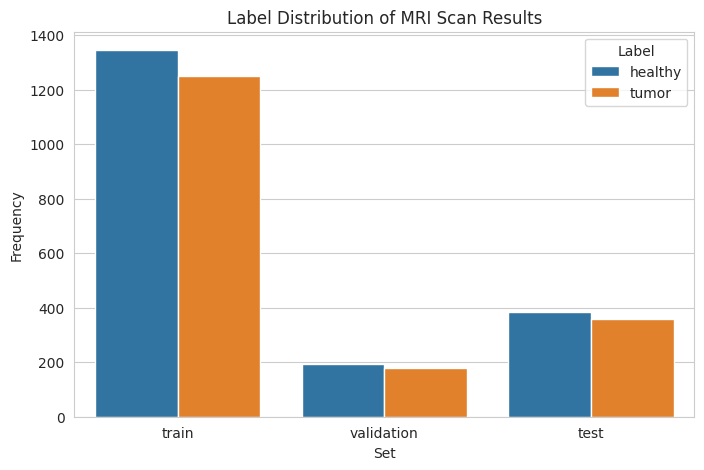

In [10]:
# Create & Save Bar Chart 
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.barplot(data=df_freq, x='Set', y='Frequency', hue='Label').set(title='Label Distribution of MRI Scan Results')

plt.savefig(f'{file_path}/labels_distribution.png', bbox_inches='tight', dpi=150)

plt.show()

### Pie Chart - Distribution of Images Across the Dataset (Healthy & Tumor)

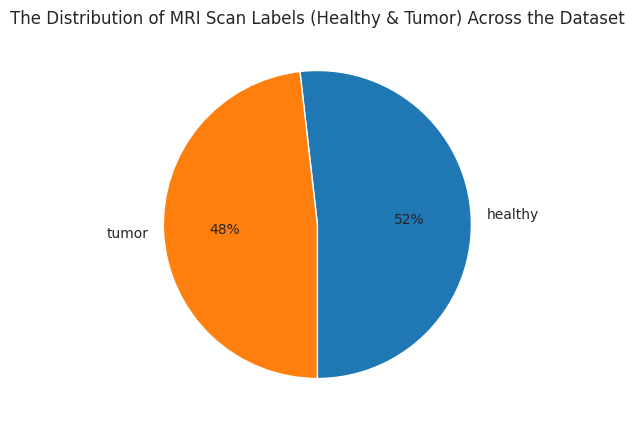

In [11]:
# Create & Save Pie Chart
plt.figure(figsize=(8, 5))
total_mriscan_label_distribution.plot(kind='pie', autopct='%.0f%%', startangle=270)
plt.title('The Distribution of MRI Scan Labels (Healthy & Tumor) Across the Dataset')
plt.ylabel('') 

plt.savefig(f'{file_path}/healthy_and_tumor_distribution.png', bbox_inches='tight', dpi=150)

plt.show()

---

## Image Data Augmentation

---

### Import ImageDataGenerator from the TensorFlow Library

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Initialise ImageDataGenerator

In [13]:
augmented_image_data = ImageDataGenerator(rotation_range=20,
                                          width_shift_range=0.10,
                                          height_shift_range=0.10,
                                          shear_range=0.1,
                                          zoom_range=0.1,
                                          horizontal_flip=True,
                                          vertical_flip=True,
                                          fill_mode='nearest',
                                          rescale=1.0/255.0
                                          )

### Set Batch Size

In [14]:
batch_size = 20

### Augmentation of the Training Image Dataset

In [15]:
train_set = augmented_image_data.flow_from_directory(train_path,
                                                     target_size=image_shape[:2],
                                                     color_mode='rgb',
                                                     batch_size=batch_size,
                                                     class_mode='binary',
                                                     shuffle=True
                                                     )

train_set.class_indices

Found 2596 images belonging to 2 classes.


{'healthy': 0, 'tumor': 1}

### Plot Augmented Training Image Dataset

(20, 177, 167, 3)


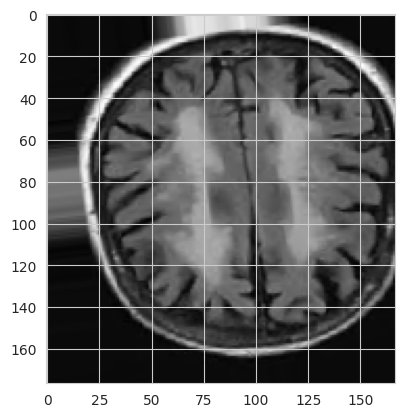

(20, 177, 167, 3)


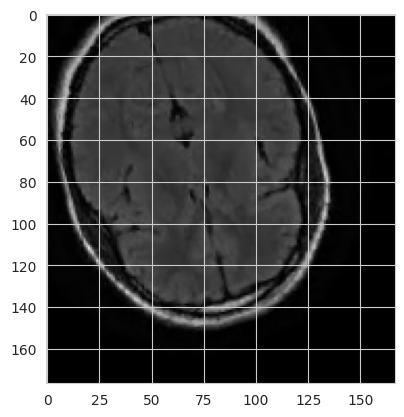

(20, 177, 167, 3)


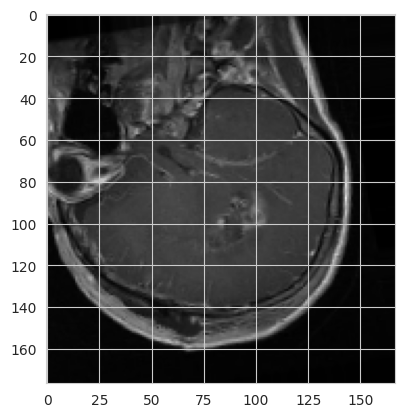

(20, 177, 167, 3)


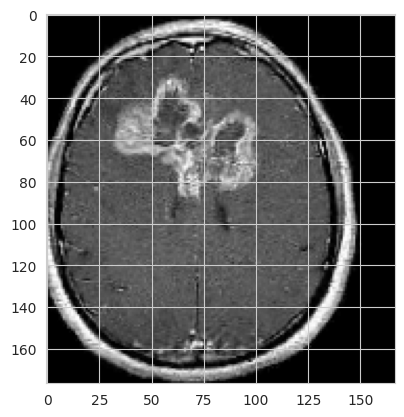

(20, 177, 167, 3)


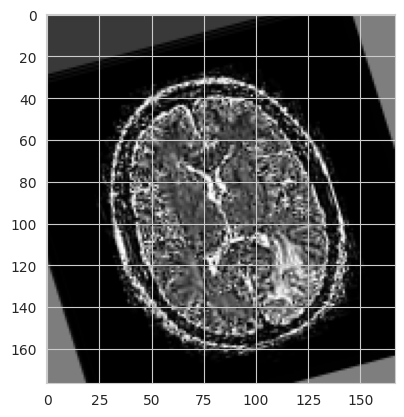

In [16]:
for _ in range(5):
    img, label = train_set.next()
    print(img.shape) 
    plt.imshow(img[0])
    plt.show()

### Augmentation of the Validation Image Dataset

In [17]:
validation_set = ImageDataGenerator(rescale=1.0/255.0).flow_from_directory(val_path,
                                                                        target_size=image_shape[:2],
                                                                        color_mode='rgb',
                                                                        batch_size=batch_size,
                                                                        class_mode='binary',
                                                                        shuffle=False
                                                                        )

validation_set.class_indices

Found 370 images belonging to 2 classes.


{'healthy': 0, 'tumor': 1}

### Plot Augmented Validation Image Dataset

(20, 177, 167, 3)


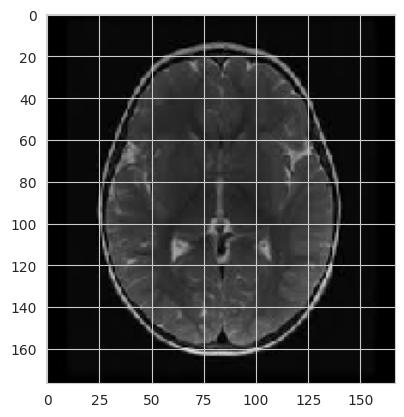

(20, 177, 167, 3)


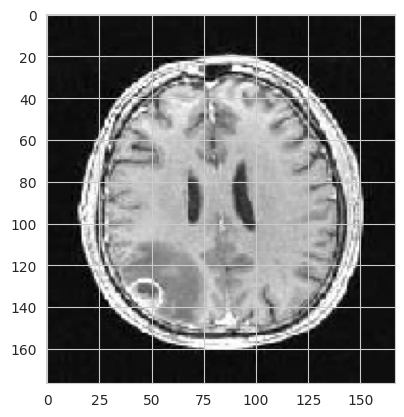

(20, 177, 167, 3)


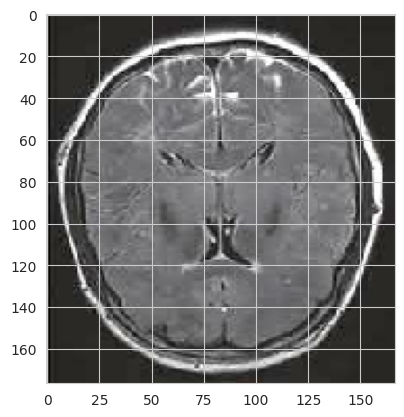

(20, 177, 167, 3)


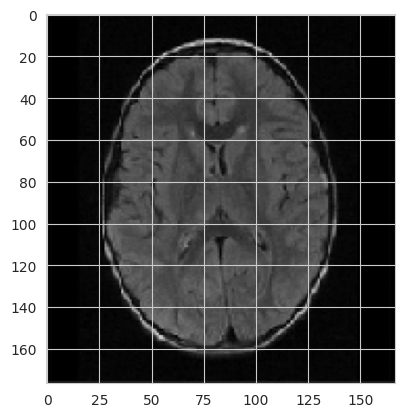

(20, 177, 167, 3)


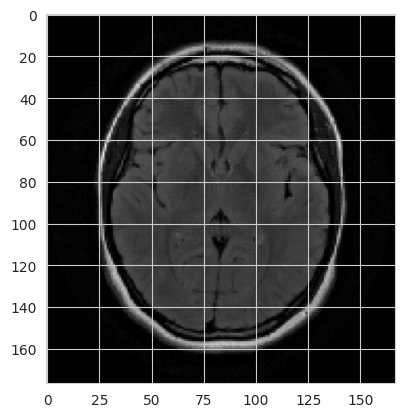

In [18]:
for _ in range(5):
    img, label = validation_set.next()
    print(img.shape) 
    plt.imshow(img[0])
    plt.show()

### Augmentation of the Test Image Dataset

In [19]:
test_set = ImageDataGenerator(rescale=1.0/255.0).flow_from_directory(test_path,
                                                                  target_size=image_shape[:2],
                                                                  color_mode='rgb',
                                                                  batch_size=batch_size,
                                                                  class_mode='binary',
                                                                  shuffle=False
                                                                  )

test_set.class_indices

Found 744 images belonging to 2 classes.


{'healthy': 0, 'tumor': 1}

### Plot Augmented Test Image Dataset

(20, 177, 167, 3)


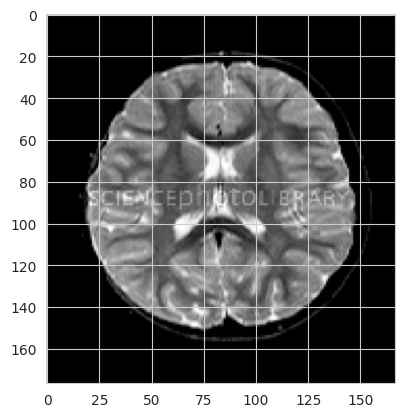

(20, 177, 167, 3)


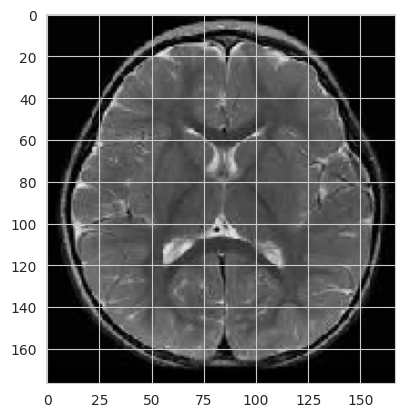

(20, 177, 167, 3)


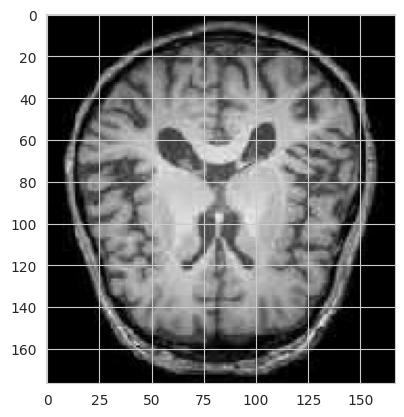

(20, 177, 167, 3)


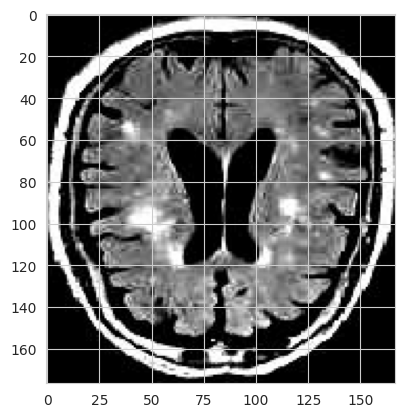

(20, 177, 167, 3)


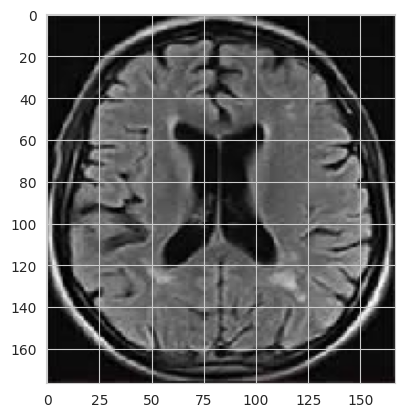

In [20]:
for _ in range(5):
    img, label = test_set.next()
    print(img.shape)
    plt.imshow(img[0])
    plt.show()

### Save Class Indices

In [21]:
joblib.dump(value=train_set.class_indices,
            filename=f"{file_path}/class_indices.pkl")

['outputs/v2/class_indices.pkl']

---

## Model Creation

---

### Import Packages

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

### Model

In [23]:
def create_tf_model():
    model = Sequential()

    # Input Layer
    model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=image_shape, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Convolutional Layers
    model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=image_shape, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=image_shape, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())

    # Fully Connected Layer
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))

    # Output Layer
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    # Prints model
    return model 

### Model Summary

In [24]:
create_tf_model().summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 175, 165, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 87, 82, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 85, 80, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 42, 40, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 40, 38, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 20, 19, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 24320)             0

2024-03-20 11:51:50.202524: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Callbacks

In [25]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop = EarlyStopping(monitor='val_accuracy', patience=2, mode='max', verbose=1)
model_checkpoint = ModelCheckpoint(filepath='outputs/v1/brain-tumor-detection.h5', monitor='val_accuracy', mode='max', save_best_only=True)

### Fit Model for Training

In [26]:
model = create_tf_model()
model.fit(train_set,
          epochs=20,
          steps_per_epoch=len(train_set.classes) // batch_size,
          validation_data=validation_set,
          callbacks=[early_stop, model_checkpoint],
          verbose=1
          )

2024-03-20 11:52:30.997691: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
129/129 [==============================] - 51s 388ms/step - loss: 0.6551 - accuracy: 0.6118 - val_loss: 0.6105 - val_accuracy: 0.6568
Epoch 2/20
129/129 [==============================] - 49s 382ms/step - loss: 0.5947 - accuracy: 0.6813 - val_loss: 0.5447 - val_accuracy: 0.7162
Epoch 3/20
129/129 [==============================] - 58s 447ms/step - loss: 0.5602 - accuracy: 0.7054 - val_loss: 0.6331 - val_accuracy: 0.6459
Epoch 4/20
129/129 [==============================] - 50s 383ms/step - loss: 0.5417 - accuracy: 0.7255 - val_loss: 0.4950 - val_accuracy: 0.7432
Epoch 5/20
129/129 [==============================] - 66s 511ms/step - loss: 0.5208 - accuracy: 0.7488 - val_loss: 0.4887 - val_accuracy: 0.7405
Epoch 6/20
129/129 [==============================] - 66s 512ms/step - loss: 0.4978 - accuracy: 0.7527 - val_loss: 0.4897 - val_accuracy: 0.7351
Epoch 00006: early stopping


### Save Best Model

In [27]:
model.save('outputs/v2/brain_tumor_detection.h5')

---

## Model Performance 

---

### Model Learning Curve - Model Training Losses

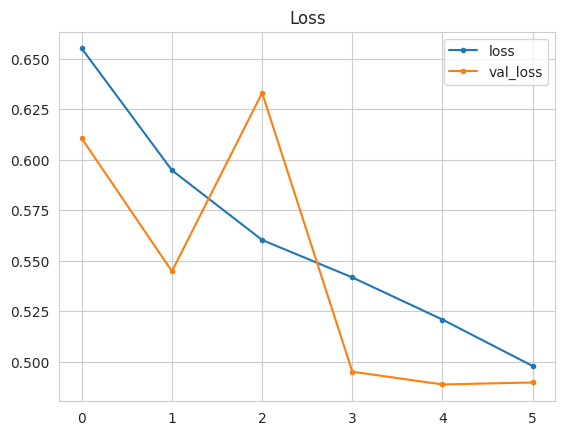

<Figure size 640x480 with 0 Axes>

In [28]:
losses = pd.DataFrame(model.history.history)

sns.set_style("whitegrid")
losses[['loss', 'val_loss']].plot(style='.-')
plt.title("Loss")
plt.show()

# Save plot
plt.savefig(f'{file_path}/model_training_losses.png',
            bbox_inches='tight', dpi=150)

### Model Learning Curve - Model Training Accuracy

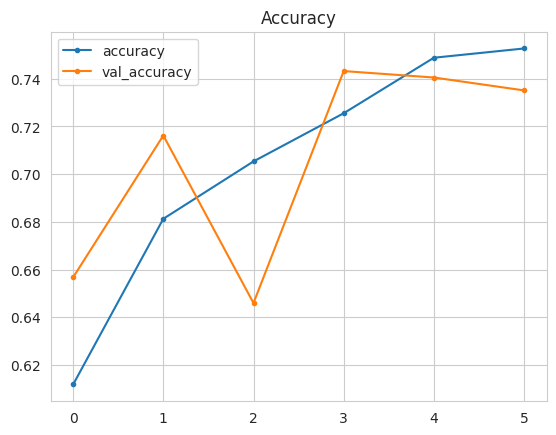

<Figure size 640x480 with 0 Axes>

In [29]:
losses[['accuracy', 'val_accuracy']].plot(style='.-')
plt.title("Accuracy")
plt.show()

# Save plot
plt.savefig(f'{file_path}/model_training_acc.png',
            bbox_inches='tight', dpi=150)


### Model Learning Curve - Model Training Loss vs Model Training Accuracy

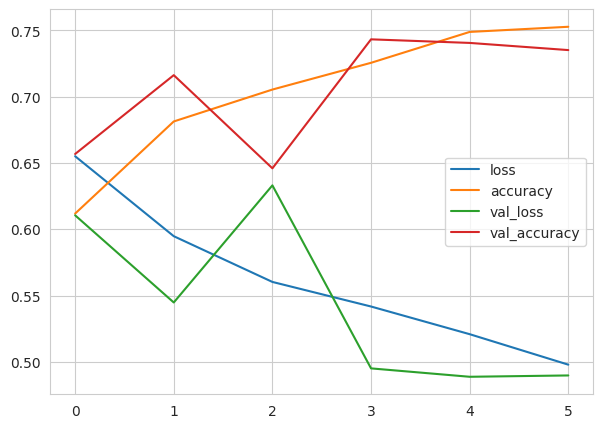

<Figure size 640x480 with 0 Axes>

In [30]:
pd.DataFrame(model.history.history).plot(figsize=(7, 5))
plt.show()

# Save plot
plt.savefig(f'{file_path}/model_loss_and_accuracy.png',
            bbox_inches='tight', dpi=150)


---

## Model Evaluation 

---

### Load Saved Model

In [32]:
from keras.models import load_model
model = load_model('outputs/v2/brain_tumor_detection.h5')

### Evaluate Model on Test Set

In [33]:
evaluation = model.evaluate(test_set)
print("Model Accuracy: {:.1f}%".format(evaluation[1] * 100))

38/38 [==============================] - 4s 98ms/step - loss: 0.4703 - accuracy: 0.7581
Model Accuracy: 75.8%


### Save Evaluation Pickle

In [55]:
joblib.dump(value=evaluation, filename=f"outputs/v1/evaluation.pkl")

['outputs/v1/evaluation.pkl']

### Model Evaluation - Confusion Matrix

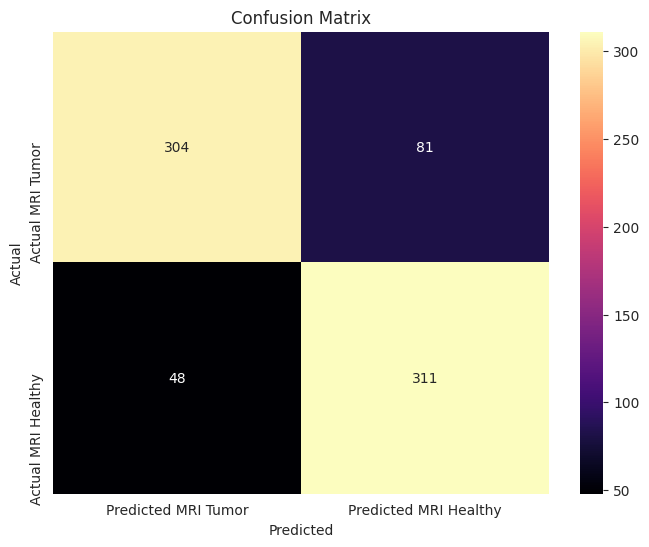

<Figure size 640x480 with 0 Axes>

In [76]:
from sklearn.metrics import confusion_matrix

preds = np.argmax(model.predict(test_set), axis=1)
y_pred = np.rint(preds)
y_true = test_set.labels
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='magma', cbar=True, 
			xticklabels=['Predicted MRI Tumor', 'Predicted MRI Healthy'], 
			yticklabels=['Actual MRI Tumor', 'Actual MRI Healthy'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Save Confusion Matrix 
plt.savefig(f'{file_path}/confusion_matrix.png', bbox_inches='tight', dpi=150)

---

## Predict on New Data

---

### Load Random Image as PIL

Image shape: (167, 177), Image mode: RGB


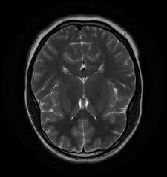

In [91]:
from tensorflow.keras.preprocessing import image

pointer = 95
label = labels[0]  

pil_image = image.load_img(test_path + '/' + label + '/' + os.listdir(test_path+'/' + label)[pointer],
                           target_size=image_shape, color_mode='rgb')
print(f'Image shape: {pil_image.size}, Image mode: {pil_image.mode}')
pil_image

### Convert Image Into Array & Prepare for Prediction

In [92]:
my_image = image.img_to_array(pil_image)
my_image = np.expand_dims(my_image, axis=0)/255
print(my_image.shape)

(1, 177, 167, 3)


### Predict Class Probabilities

In [94]:
pred_proba = model.predict(my_image)[0, 0]

target_map = {v: k for k, v in train_set.class_indices.items()}
pred_class = target_map[pred_proba > 0.5]

if pred_class == target_map[0]:
    pred_proba = 1 - pred_proba


print(f"{pred_class}: {round(pred_proba * 100, 1)}%")

tumor: 94.0%
